In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
data = pd.read_csv('challenge_dataset.csv')

In [3]:
data.head()

,CustomerID,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Churn
0,55388,5.0,Mobile Phone,1,9.0,Debit Card,4.0,4,Mobile Phone,3.0,3,0.0,15.0,2.0,2.0,4.0,159.77,0.0
1,52565,2.0,Phone,1,15.0,CC,NaN,3,Mobile,3.0,10,0.0,17.0,0.0,1.0,2.0,129.74,0.0
2,50690,13.0,Mobile Phone,1,20.0,Credit Card,2.0,4,Others,3.0,2,0.0,NaN,4.0,4.0,9.0,296.26,0.0
3,52456,NaN,Phone,1,8.0,Debit Card,3.0,3,Mobile,5.0,2,1.0,12.0,1.0,1.0,0.0,120.74,1.0
4,51153,19.0,Mobile Phone,1,8.0,Credit Card,2.0,3,Others,1.0,8,1.0,NaN,1.0,2.0,2.0,293.28,0.0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4661 entries, 0 to 4660
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   4661 non-null   int64  
 1   Tenure                       4430 non-null   float64
 2   PreferredLoginDevice         4661 non-null   object 
 3   CityTier                     4661 non-null   int64  
 4   WarehouseToHome              4444 non-null   float64
 5   PreferredPaymentMode         4661 non-null   object 
 6   HourSpendOnApp               4453 non-null   float64
 7   NumberOfDeviceRegistered     4661 non-null   int64  
 8   PreferedOrderCat             4577 non-null   object 
 9   SatisfactionScore            4283 non-null   float64
 10  NumberOfAddress              4661 non-null   int64  
 11  Complain                     4559 non-null   float64
 12  OrderAmountHikeFromlastYear  4429 non-null   float64
 13  CouponUsed        

## Exploratory Data Analysis

    * Univariate Analysis: Focuses on examining individual variables to uncover patterns and insights.
    * Bivariate Analysis: Investigates the relationship between two variables to reveal underlying connections and trends.
    * Multivariate Analysis: Explores interactions among multiple variables to discern complex patterns and insights.

#### Univariate Analysis

    * During model training, CustomerID is excluded as it doesn’t influence the predictions, such as churn probability. However, it’s essential during real-time decisions to connect predictions to specific customers.

    * Numerical Features: Calculate descriptive statistics like mean, median, mode, standard deviation, variance, and generate distribution plots.
    
    * Categorical Features: Create frequency distribution tables and plots.

In [76]:
def summary_statistics(df, column):
    # Descriptive statistics
    min = df[column].min()
    max = df[column].max()
    mean = df[column].mean()
    median = df[column].median()
    mode = df[column].mode()[0]
    std_dev = df[column].std()
    variance = df[column].var()
    missing_values = df[column].isnull().sum()
    total_count = df[column].count() + missing_values

    # Creating a summary table
    statistics = {
        'Statistic': ['Min', 'Max', 'Mean', 'Median', 'Mode', 'Standard Deviation', 'Variance','Missing Values','Total Count'],
        'Value': [min, max, mean, median, mode, std_dev, variance, missing_values, total_count]
    }
    summary_df = pd.DataFrame(statistics)
    return summary_df

def plot_distribution(df, column):
    # Create the plot
    plt.figure(figsize=(20, 6))
    sns.countplot(x=column,data=df)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

def plot_distribution_frequency(df, column):
    # Create the plot
    plt.figure(figsize=(8, 5))
    print(df[column].value_counts())
    sns.countplot(x=column,data=df,color='orange')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

#### Tenure

            Statistic        Value
0                Mean    10.239955
1              Median     9.000000
2                Mode     1.000000
3  Standard Deviation     8.571560
4            Variance    73.471648
5      Missing Values   231.000000
6         Total Count  4661.000000


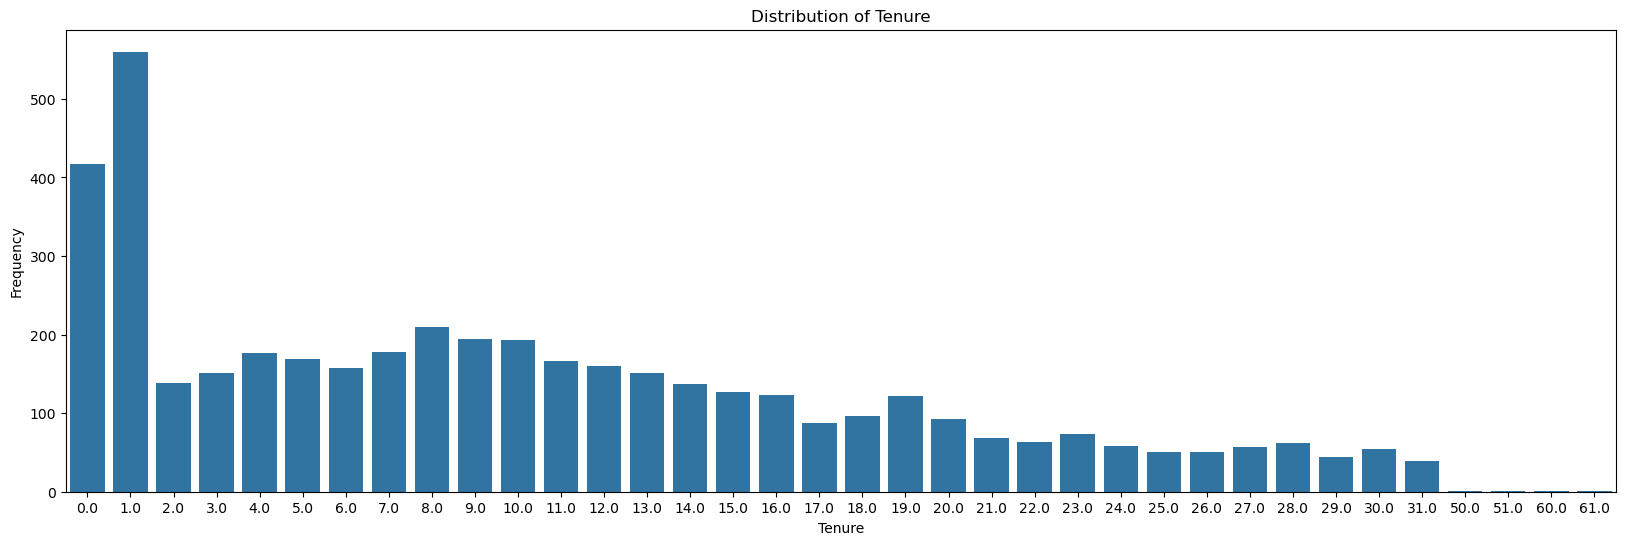

In [69]:
print(summary_statistics(data,'Tenure'))
plot_distribution(data,'Tenure')

#### Insights (I) & Actions (A) for Tenure Feature

* I - The tenure data shows a mean of 10.23 years and a mode of 1 year, indicating high tenure within the first year but some long-term retention
* A - Address the 231 missing tenure values through imputation to ensure the reliability of machine learning models

#### Preferred Login Device

Mobile Phone    2294
Computer        1354
Phone           1013
Name: PreferredLoginDevice, dtype: int64


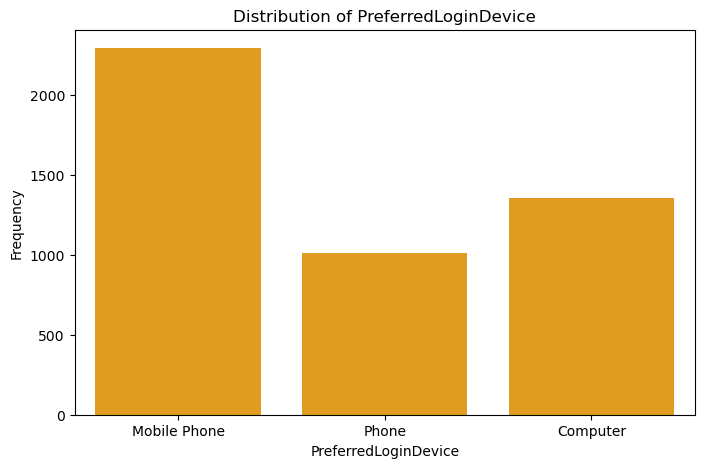

In [72]:
plot_distribution_frequency(data, 'PreferredLoginDevice')

#### Insights (I) & Actions (A) for Preferred Login Device

* I - The data indicates a strong preference for mobile devices ('Mobile Phone' and 'Phone') over computers for login, suggesting users are more mobile-oriented
* A - I should combine 'Mobile Phone' and 'Phone' into a single category in my machine learning models part of feature engineering

#### City Tier

1    3077
3    1380
2     204
Name: CityTier, dtype: int64


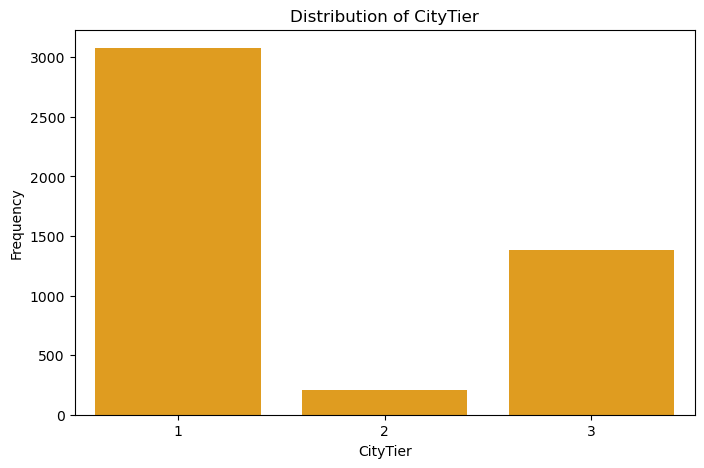

In [73]:
plot_distribution_frequency(data, 'CityTier')

#### Insights (I) & Actions (A) for City Tier

* I - The majority of users are from Tier 1 cities, indicating a potential concentration of user base in more developed urban areas.
* A - NA

#### Preferred Login Warehouse To Home

            Statistic        Value
0                 Min     5.000000
1                 Max   127.000000
2                Mean    15.681368
3              Median    14.000000
4                Mode     9.000000
5  Standard Deviation     8.572457
6            Variance    73.487017
7      Missing Values   217.000000
8         Total Count  4661.000000


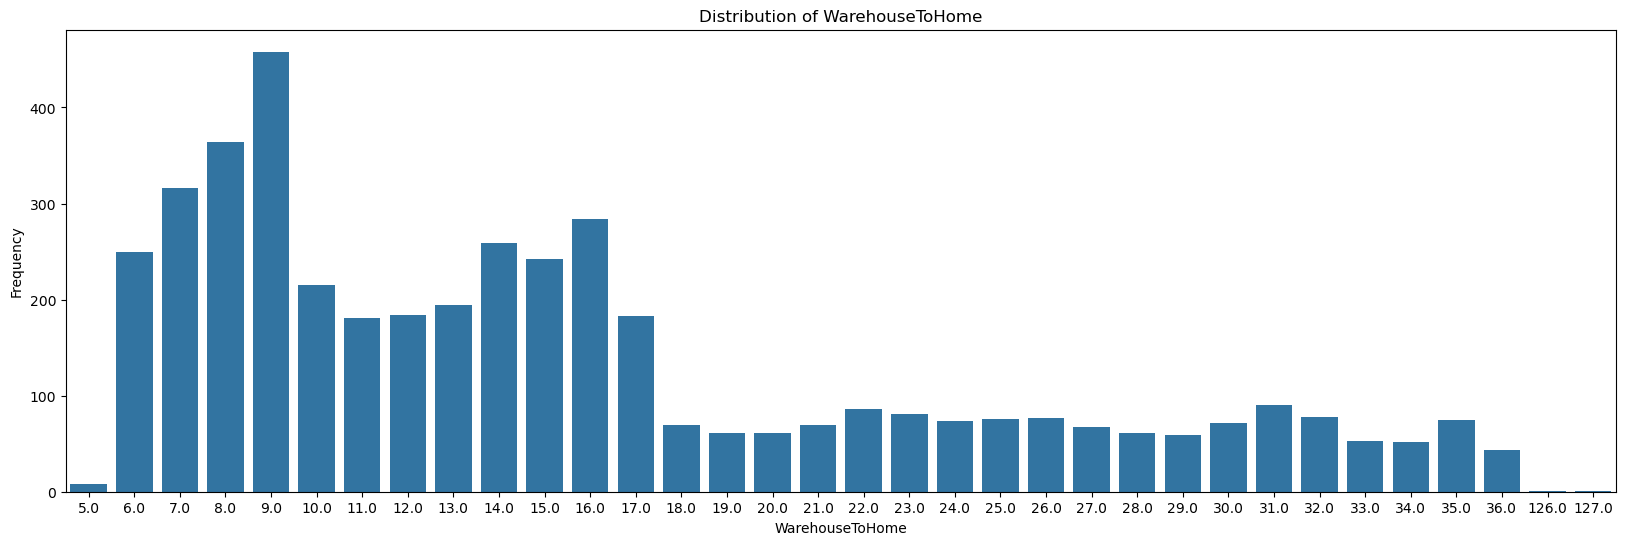

In [77]:
print(summary_statistics(data,'WarehouseToHome'))
plot_distribution(data,'WarehouseToHome')

#### Insights (I) & Actions (A) for Warehouse To Home

* I - The Warehouse To Home distance is predominantly short, with a mean at 15 and mode of 9 kilometers, suggesting most customers are concentrated near the warehouse, but a long tail to 127 kilometers indicates some far-off deliveries.
* A - Address the 217 missing values and could be possibly do bining for model interpretibility

#### Hour Spend On App

3.0    2250
2.0    1208
4.0     964
1.0      28
0.0       2
5.0       1
Name: HourSpendOnApp, dtype: int64


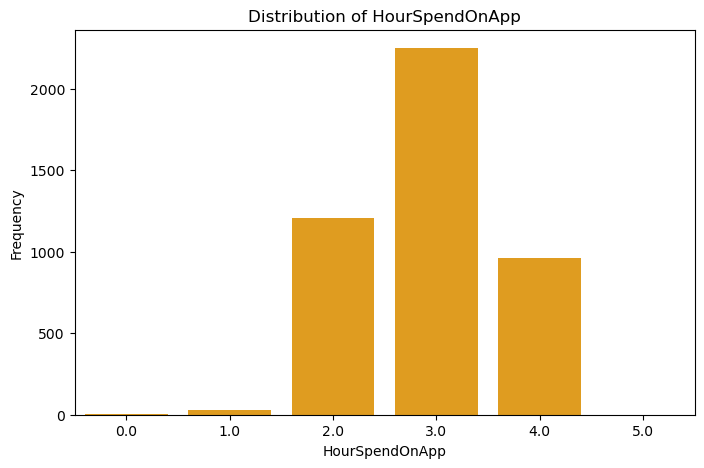

In [81]:
plot_distribution_frequency(data,'HourSpendOnApp')

#### Insights (I) & Actions (A) for Warehouse To Home

* I - A significant majority of users spend 2 to 3 hours on the mobile application or website, indicating a core engagement window, with very few users spending very little (0-1 hours) or much more time (5 hours)
* A - NA

#### Number of Device Registered

4    1980
3    1415
5     718
2     223
1     192
6     133
Name: NumberOfDeviceRegistered, dtype: int64


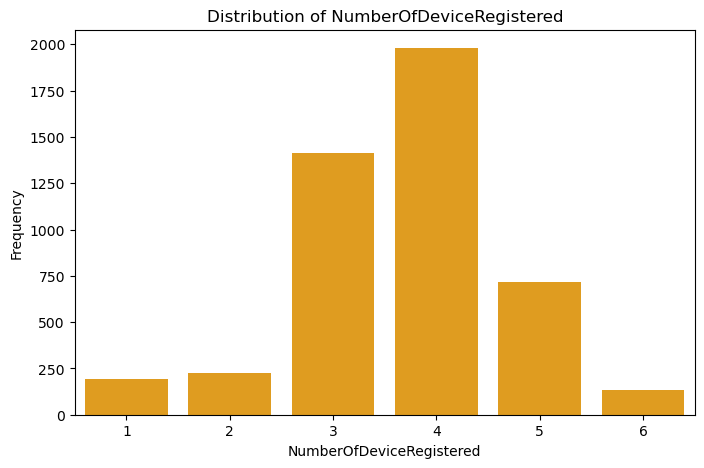

In [82]:
plot_distribution_frequency(data, 'NumberOfDeviceRegistered')

#### Insights (I) & Actions (A) for Number of Devices Registered

* I - Most users have multiple devices registered on their accounts, with 3 to 4 devices being the most common, suggesting a high level of engagement and potential dependence on the service
* A - NA

#### Prefered Order Cat

Laptop & Accessory    1667
Mobile Phone          1037
Mobile                 665
Fashion                643
Grocery                337
Others                 228
Name: PreferedOrderCat, dtype: int64


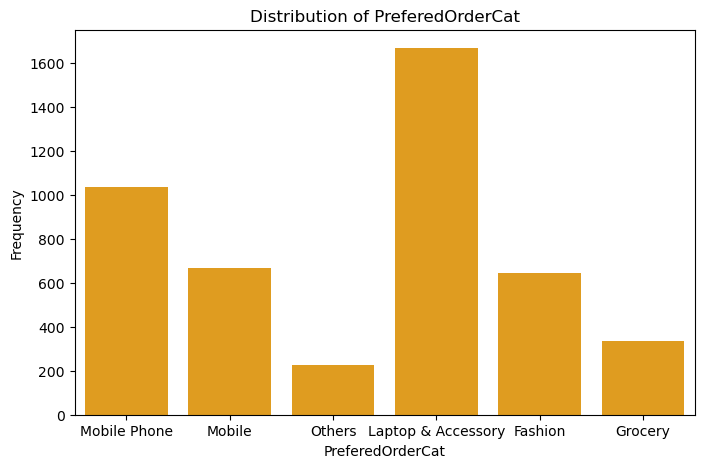

In [83]:
plot_distribution_frequency(data, 'PreferedOrderCat')

#### Insights (I) & Actions (A) for Number of Devices Registered

* I - The highest preference among users is for 'Laptop & Accessory' and 'Mobile Phone' categories, indicating a strong consumer focus on technology-related products over categories like fashion and groceries
* A - Need to combine Mobile Phone & Mobile during feature engineering

#### Satisfaction Score

3.0    1260
1.0     892
5.0     841
4.0     838
2.0     452
Name: SatisfactionScore, dtype: int64


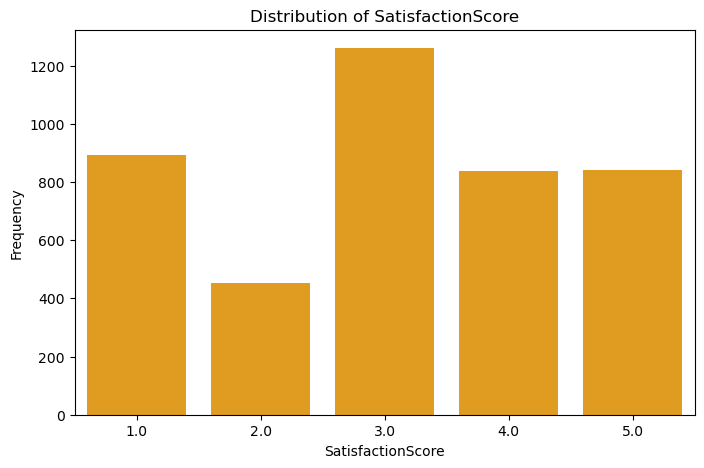

In [84]:
plot_distribution_frequency(data, 'SatisfactionScore')

#### Insights (I) & Actions (A) for Number of Satisfaction Score

* I - Customer satisfaction scores are widely distributed, with a notable concentration at the mid-point (score 3.0), suggesting a significant portion of customers feel neutral about the service, while extremes (very satisfied or dissatisfied) are less common but still significant
* A - NA

#### Number of Address

2     1103
3     1030
4      497
5      482
6      333
1      315
8      238
7      213
9      193
10     171
11      81
20       2
19       1
21       1
22       1
Name: NumberOfAddress, dtype: int64


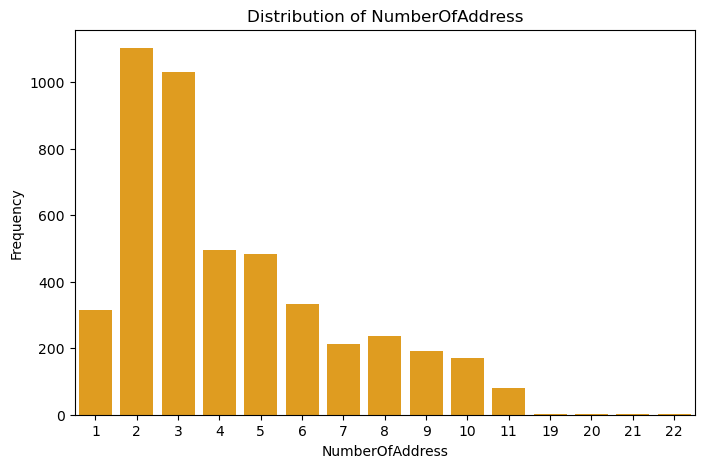

In [85]:
plot_distribution_frequency(data, 'NumberOfAddress')

#### Insights (I) & Actions (A) for Number of Number of Address

* I - A significant number of customers have multiple addresses linked to their accounts, with 2 to 3 addresses being the most common, suggesting flexibility in delivery options
* A - NA

#### Complain

0.0    3290
1.0    1269
Name: Complain, dtype: int64


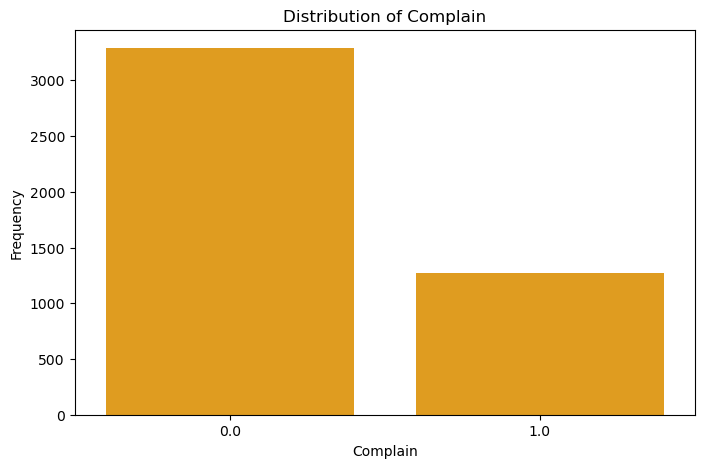

In [88]:
plot_distribution_frequency(data, 'Complain')

#### Insights (I) & Actions (A) for Number of Complains

* I - The majority of customers have not registered a complaint (0.0), indicating overall satisfaction or fewer issues with the service, while a smaller yet significant portion have lodged a complaint (1.0), signaling areas for improvement.
* A - NA

#### Order Amount Hike From Last Year

            Statistic        Value
0                 Min    11.000000
1                 Max    26.000000
2                Mean    15.737864
3              Median    15.000000
4                Mode    13.000000
5  Standard Deviation     3.681930
6            Variance    13.556608
7      Missing Values   232.000000
8         Total Count  4661.000000


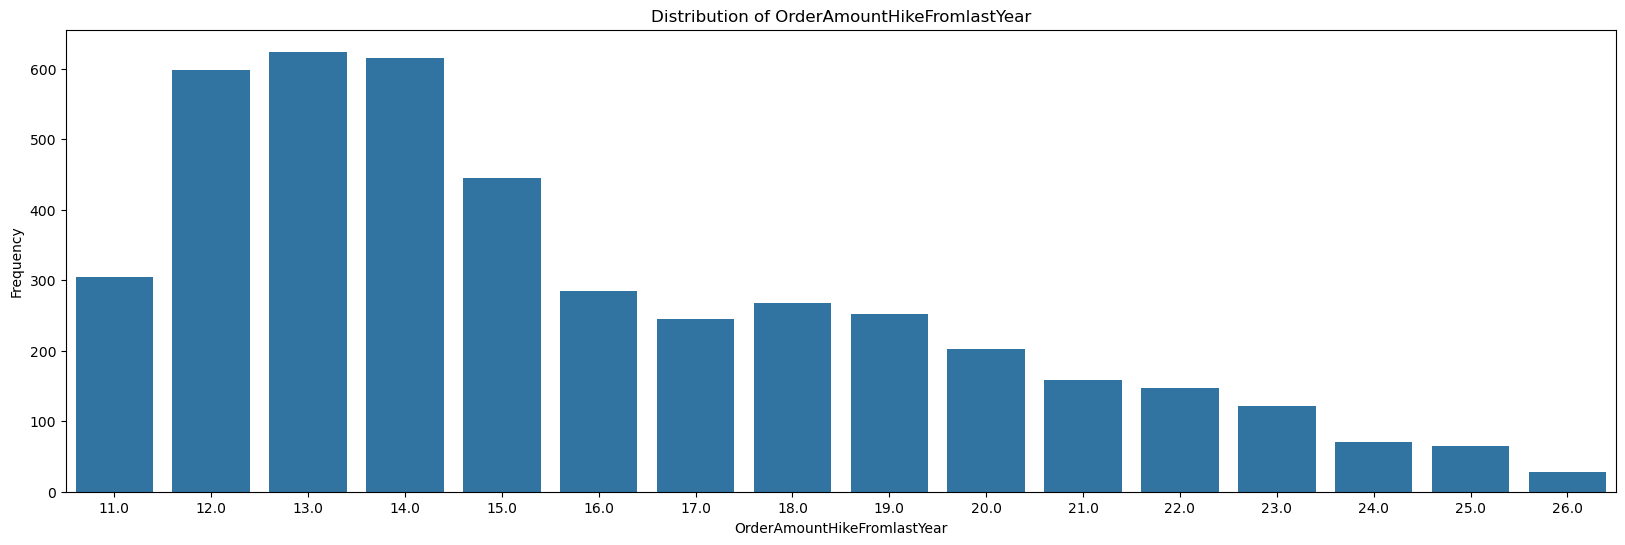

In [89]:
print(summary_statistics(data,'OrderAmountHikeFromlastYear'))
plot_distribution(data,'OrderAmountHikeFromlastYear')

#### Insights (I) & Actions (A) for Order Amount Hike From Last Year

* I - The percentage increase in order value compared to last year has a mean of 15.74%, with most values clustering tightly around the median of 15%, suggesting a moderate but consistent growth across orders. The mode at 13% indicates the most frequent rate of increase experienced by customers.
* A - Found 232 missing values and I should address during machine learning model training

#### Coupons Used

1.0     1749
2.0     1075
0.0      873
3.0      275
4.0      159
5.0       97
6.0       79
7.0       63
8.0       38
10.0      11
11.0       9
12.0       8
9.0        8
13.0       7
14.0       5
16.0       2
Name: CouponUsed, dtype: int64


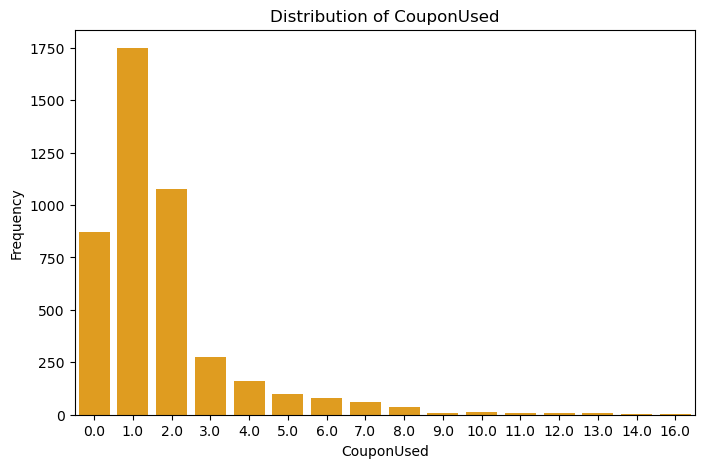

In [91]:
plot_distribution_frequency(data, 'CouponUsed')

#### Insights (I) & Actions (A) for Coupons Used

* I - The distribution of coupons used by customers shows that a single coupon (1.0) is the most common, followed by two coupons (2.0), with usage tapering off significantly as the number of coupons increases. 
* A - NA

#### Order Count

2.0     1702
1.0     1456
3.0      305
4.0      168
5.0      154
7.0      150
8.0      140
6.0      117
9.0       47
12.0      45
11.0      40
10.0      30
15.0      28
14.0      28
13.0      23
16.0      17
Name: OrderCount, dtype: int64


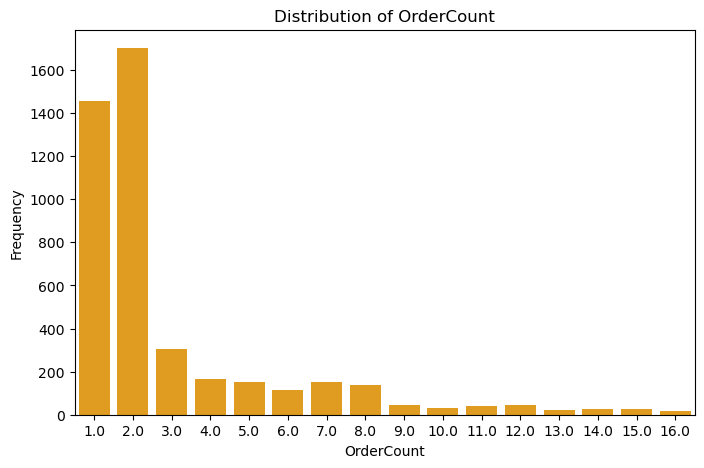

In [92]:
plot_distribution_frequency(data, 'OrderCount')

#### Insights (I) & Actions (A) for Order Count

* I - Most customers placed either 1 or 2 orders last month, with a significant drop in frequency as the number of orders increases, indicating that while a core group of customers orders frequently, most limit their purchases
* A - NA

#### Day Since Last Order

3.0     747
2.0     666
1.0     506
8.0     425
0.0     424
4.0     365
7.0     352
9.0     247
5.0     192
10.0    136
6.0      87
11.0     78
12.0     55
13.0     47
14.0     28
15.0     15
17.0     14
16.0     13
18.0     10
31.0      1
46.0      1
Name: DaySinceLastOrder, dtype: int64


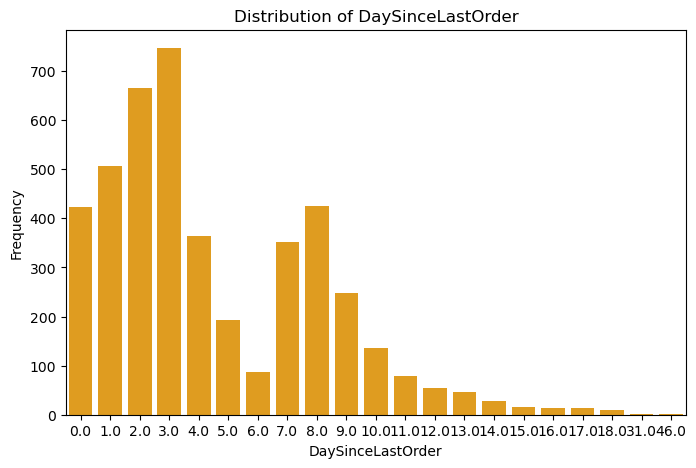

In [93]:
plot_distribution_frequency(data, 'DaySinceLastOrder')

#### Insights (I) & Actions (A) for Day Since Last Order

* I -  large number of customers ordering very recently (within a few days), with a peak at 3 days since the last order. However, there are noticeable counts for customers whose last order was significantly longer ago, up to 31 and 46 days.
* A - 

#### Cash back Amount

            Statistic        Value
0                 Min     0.000000
1                 Max   324.990000
2                Mean   177.361390
3              Median   163.380000
4                Mode   123.420000
5  Standard Deviation    49.919774
6            Variance  2491.983817
7      Missing Values   121.000000
8         Total Count  4661.000000


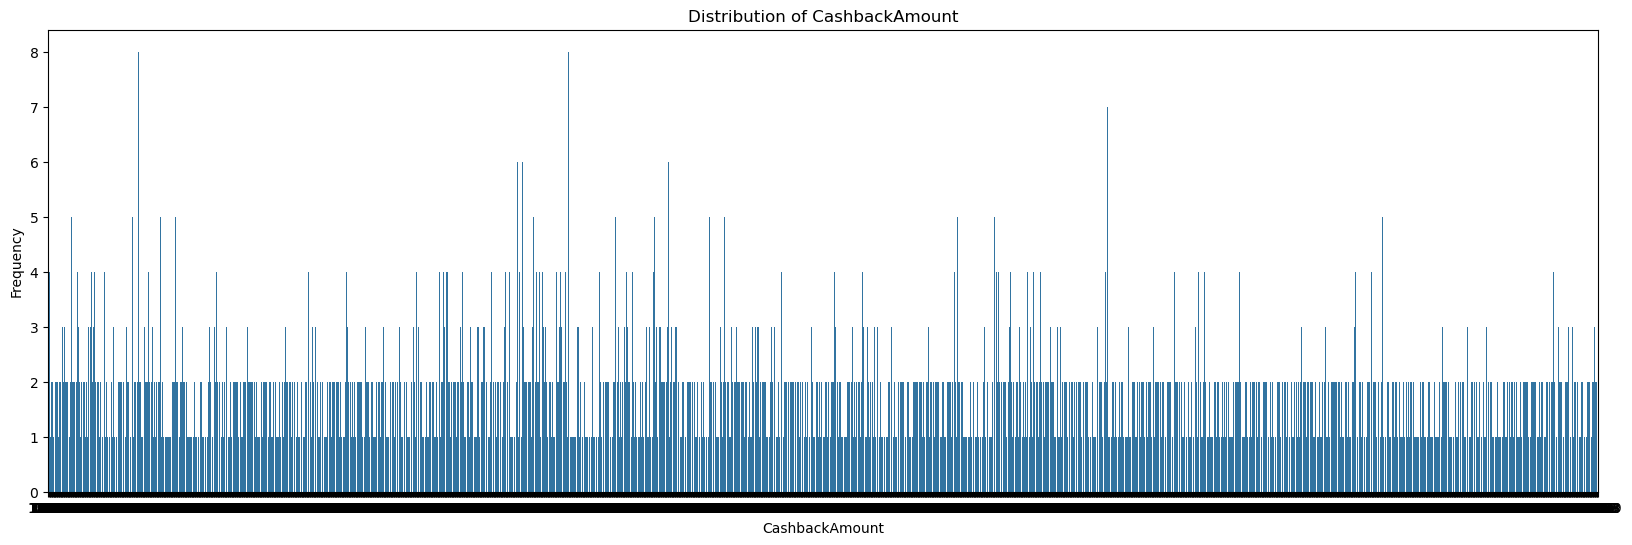

In [94]:
print(summary_statistics(data,'CashbackAmount'))
plot_distribution(data,'CashbackAmount')

#### Insights (I) & Actions (A) for CashbackAmount

* I -  The average cashback received last month is around 177.36, with a median of 163.38 and a mode of 123.42, indicating that most customers receive moderate cashback amounts
* A - 121 missing values I should address during machine learning model training

#### Churn

0.0    3860
1.0     774
Name: Churn, dtype: int64


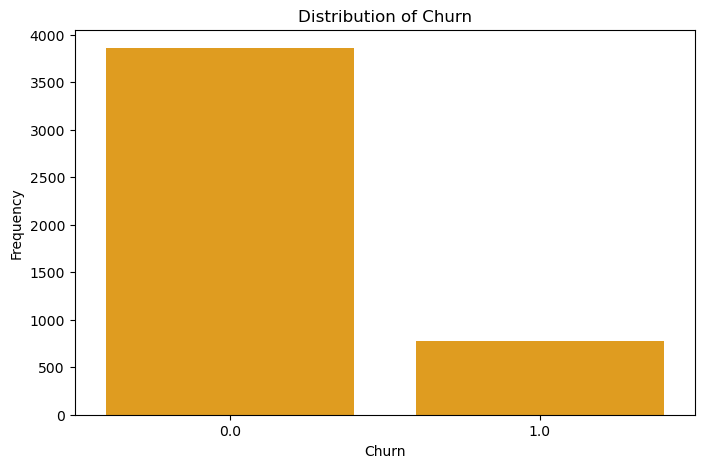

In [95]:
plot_distribution_frequency(data, 'Churn')

#### Insights (I) & Actions (A) for Churn

* I -  The churn rate is relatively low, with 20% of customers (1.0) having churned and 80% (0.0) retained, indicating overall stability but highlighting a segment that requires attention to prevent further churn.
* A - 

#### Bivariate Analysis

In [46]:
def bivariate_visuals_cate(df, col, target):
    pivot_data = df.pivot_table(index=col, columns=target, aggfunc='size')
    print(pivot_data)
    pivot_data.plot(kind='bar', stacked=True, colormap='viridis')

def bivariate_visuals_numerical(df, col, target):
    grouped_data = df.groupby(target)[col].agg(['mean', 'median', 'max', 'min', 'count'])
    print(grouped_data)
    plt.figure(figsize=(20, 6))
    sns.histplot(data=data, x=col, hue=target,multiple="dodge", shrink=.8)

#### Tenure with Churn

            mean  median   max  min  count
Churn                                     
0.0    11.471018    10.0  61.0  0.0   3692
1.0     3.889045     1.0  31.0  0.0    712


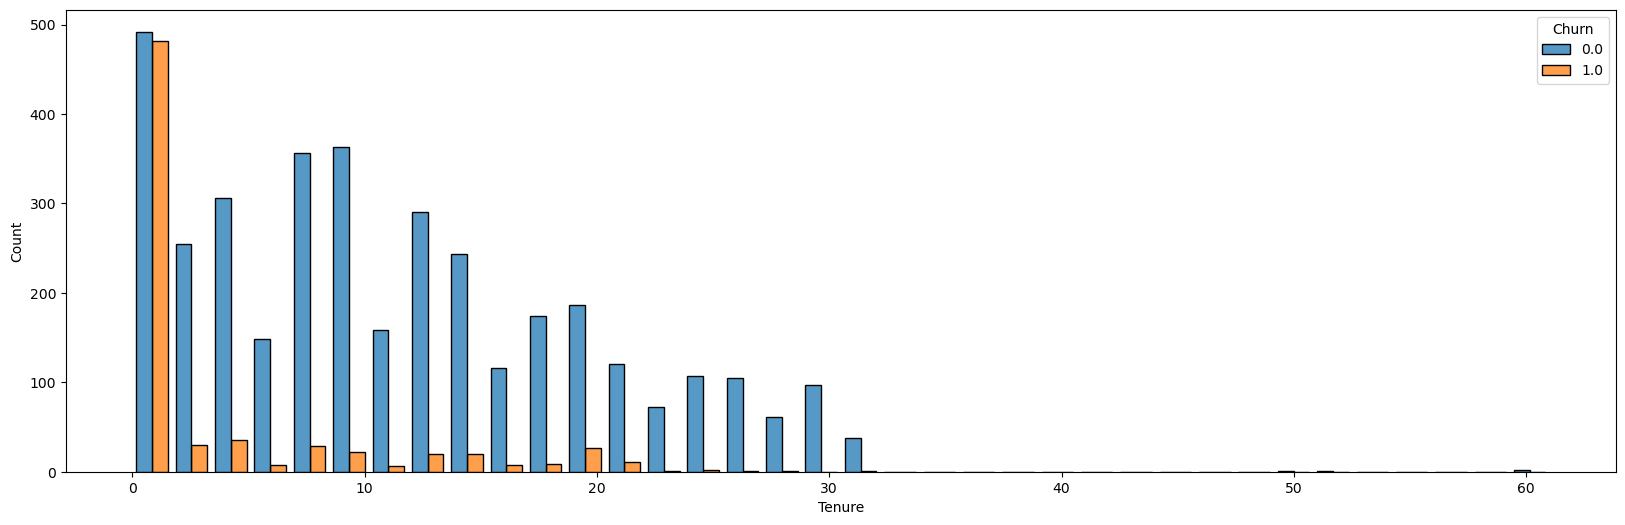

In [47]:
bivariate_visuals_numerical(data, 'Tenure', 'Churn')

#### Insights Tenure with Churn

- Customers who churn tend to have a significantly shorter tenure (average of 3.9 months) compared to those who don't (average of 11.5 months). Strategies to engage customers early in their lifecycle could be crucial in reducing churn and enhancing long-term customer retention

#### Preferred Login Device with Churn

Churn                  0.0  1.0
PreferredLoginDevice           
Computer              1079  266
Mobile Phone          1999  283
Phone                  782  225


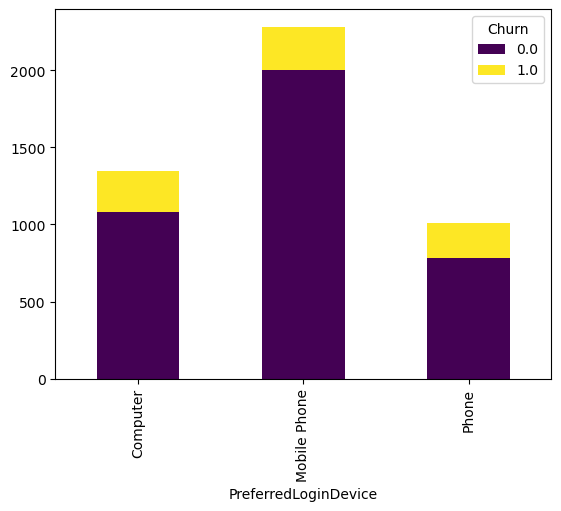

In [48]:
bivariate_visuals_cate(data, 'PreferredLoginDevice', 'Churn')

#### Insights Prefered Login Devices with Churn

- Customers who prefer logging in via Mobile Phone have the highest retention rate, with the lowest proportion of churn compared to other devices. Conversely, customers using a Phone have the highest churn rate relative to their count.

#### Preferred City Tier with Churn

Churn      0.0  1.0
CityTier           
1         2619  439
2          163   40
3         1078  295


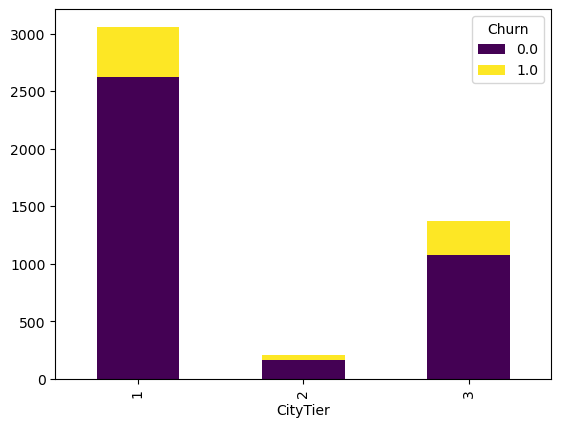

In [49]:
bivariate_visuals_cate(data, 'CityTier', 'Churn')

#### Insights City Tier Devices with Churn

- Customers in CityTier 1 have the highest absolute number of churns but a relatively lower churn rate compared to CityTier 3, which has a significantly higher churn rate despite fewer customers. Targeted retention strategies in CityTier 3 could be beneficial in reducing overall churn rates

#### Preferred Warehouse To Home with Churn

            mean  median    max  min  count
Churn                                      
0.0    15.423419    13.0  127.0  5.0   3715
1.0    17.106686    15.0   36.0  5.0    703


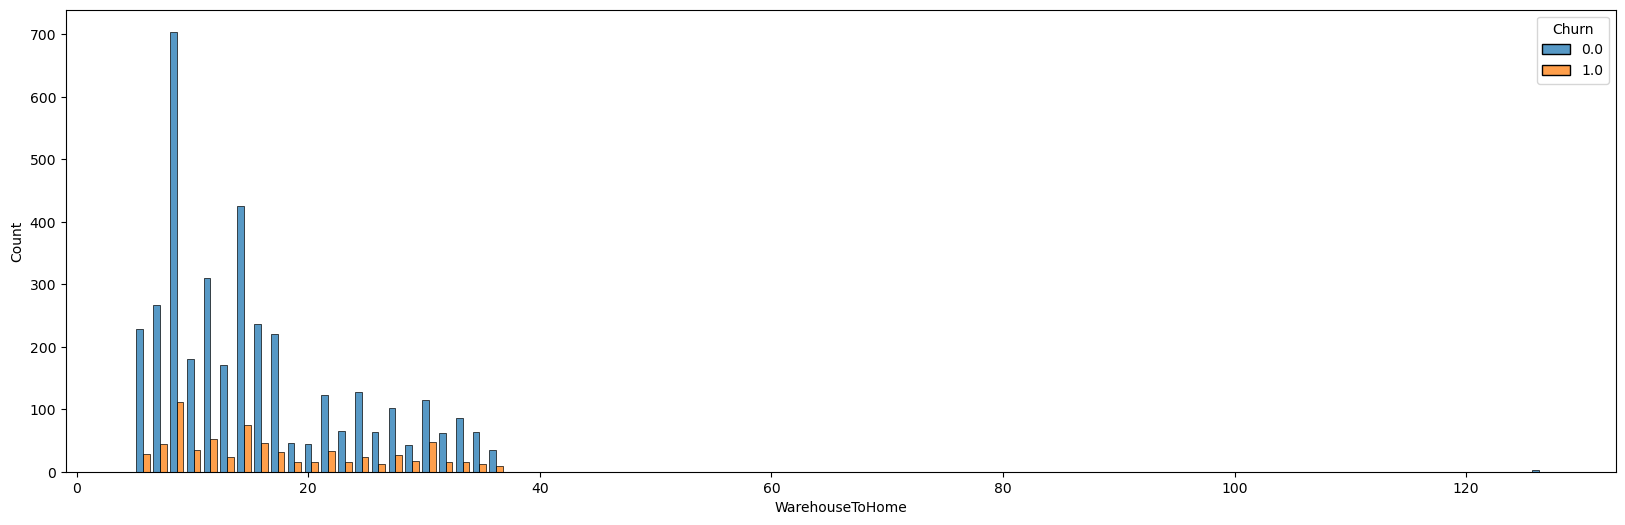

In [50]:
bivariate_visuals_numerical(data, 'WarehouseToHome', 'Churn')

#### Insights Ware House to Home with Churn

- Customers who churn tend to have a slightly higher average (17.11) and median (15) distance from the warehouse to their homes compared to non-churners (mean of 15.42, median of 13). This suggests that longer delivery times may contribute to churn

In [ ]:
#### Preferred Preferred Payment Mode with Churn

Churn                  0.0  1.0
PreferredPaymentMode           
CC                     183   50
COD                    209   88
Cash on Delivery       101   19
Credit Card           1080  153
Debit Card            1616  296
E wallet               373  115
UPI                    298   53


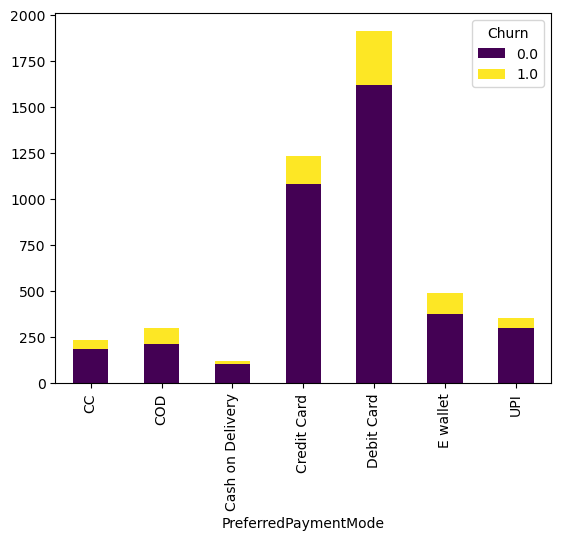

In [51]:
bivariate_visuals_cate(data, 'PreferredPaymentMode', 'Churn')

#### Insights Preferred Payment Mode with Churn

Customers using Debit Card and E-wallet have higher counts of churn (296 and 115 respectively) compared to other payment methods. This suggests that there might be issues or dissatisfactions associated with these payment modes

#### Preferred Hour Spend on App with Churn

Churn              0.0    1.0
HourSpendOnApp               
0.0                2.0    NaN
1.0               28.0    NaN
2.0             1014.0  188.0
3.0             1853.0  383.0
4.0              804.0  156.0
5.0                1.0    NaN


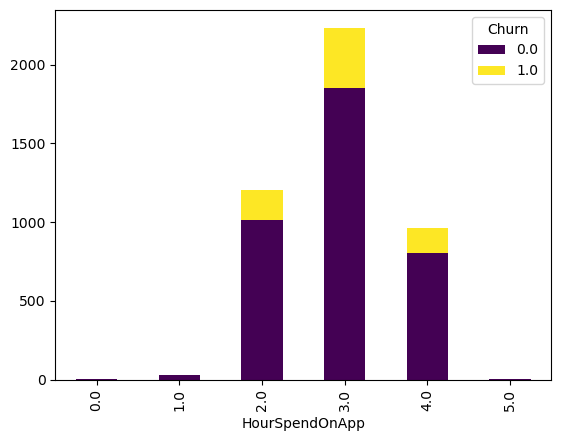

In [52]:
bivariate_visuals_cate(data, 'HourSpendOnApp', 'Churn')

#### Insights Hours Spend on App with Churn

significant increase in churn rates for users spending 3 hours on the app, with 383 out of 2236 churning, indicating potential issues or dissatisfaction at this usage level. Lower usage (0, 1, and 5 hours) shows negligible to no churn, suggesting that either very light or very heavy users are more likely to stay. Optimizing app engagement for users in the 2-4 hours range might help reduce churn rates

#### Preferred Hour Spend on App with Churn

Churn                      0.0  1.0
NumberOfDeviceRegistered           
1                          173   18
2                          200   22
3                         1196  210
4                         1653  315
5                          554  160
6                           84   49


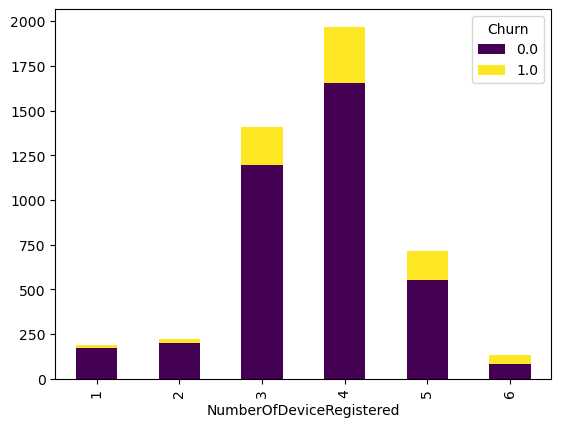

In [53]:
bivariate_visuals_cate(data, 'NumberOfDeviceRegistered', 'Churn')

#### Insights Number of Devices Registered with Churn

Churn rates increase significantly with the number of devices registered. Users with 4 devices registered show the highest numbers of churn (315 out of 1968), suggesting potential issues with multi-device management or user experience. Interestingly, as the number of devices increases to 6, although the base is smaller

#### Preferred Order Cart with Churn

Churn                0.0  1.0
PreferedOrderCat             
Fashion              540  103
Grocery              322   15
Laptop & Accessory  1498  169
Mobile               491  174
Mobile Phone         753  284
Others               211   17


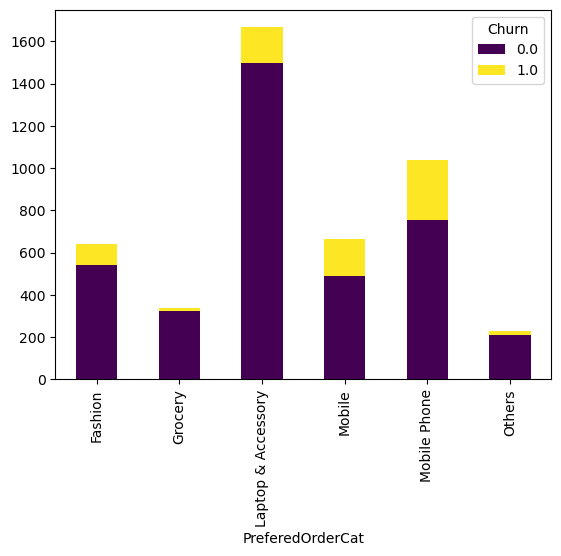

In [54]:
bivariate_visuals_cate(data, 'PreferedOrderCat', 'Churn')

#### Insights Number of Prefered Order Cart with Churn

Combining the categories "Mobile" and "Mobile Phone" shows a total of 458 users churning out of 2408, making it the category with the highest absolute number of churns. This combined category significantly indicates dissatisfaction or service issues in mobile-related purchases.

#### Satisfaction Score with Churn

Churn               0.0  1.0
SatisfactionScore           
1.0                 794   98
2.0                 400   52
3.0                1046  214
4.0                 690  148
5.0                 641  200


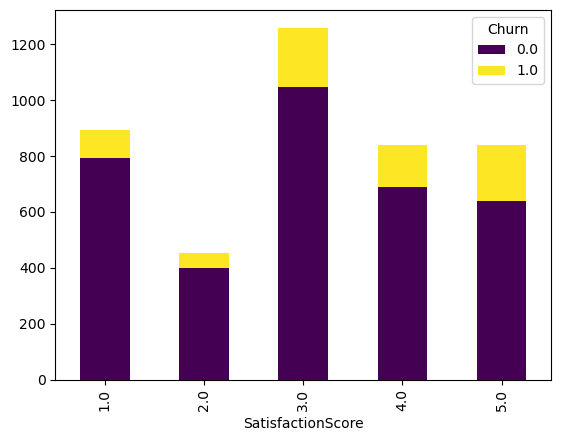

In [56]:
bivariate_visuals_cate(data, 'SatisfactionScore', 'Churn')

#### Insights Satisfaction Score with Churn

Notable trend where higher churn rates are observed with lower satisfaction scores. Customers with the highest satisfaction score (5) have a considerable churn number (200 out of 841), suggesting that even satisfied customers might have reasons to leave, possibly due to factors not captured by the satisfaction score alone. However, the highest churn is observed among those with a satisfaction score of 3 (214 out of 1260), indicating specific dissatisfaction at this level

#### Number of Address with Churn

Churn              0.0    1.0
NumberOfAddress              
1                278.0   36.0
2                914.0  185.0
3                845.0  178.0
4                436.0   60.0
5                421.0   54.0
6                270.0   61.0
7                163.0   50.0
8                175.0   60.0
9                156.0   36.0
10               137.0   33.0
11                63.0   18.0
19                 NaN    1.0
20                 NaN    2.0
21                 1.0    NaN
22                 1.0    NaN


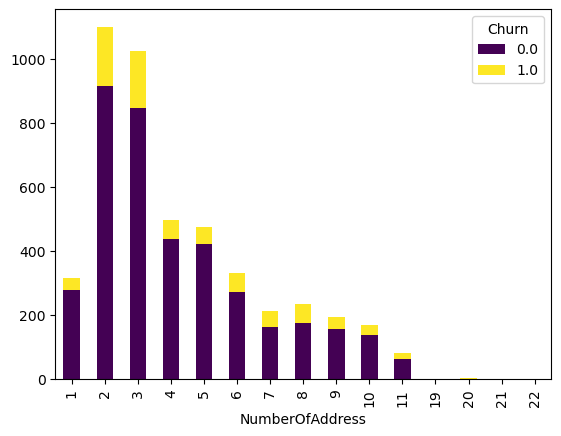

In [57]:
bivariate_visuals_cate(data, 'NumberOfAddress', 'Churn')

#### Insights Number of Addresses with Churn

Customers with 2 and 3 addresses also exhibit relatively high churn rates—185 out of 1099 for 2 addresses, and 178 out of 1023 for 3 addresses. This pattern suggests a trend where having multiple addresses might be associated with higher churn

#### Complains with Churn

Churn      0.0  1.0
Complain           
0.0       2940  350
1.0        861  408


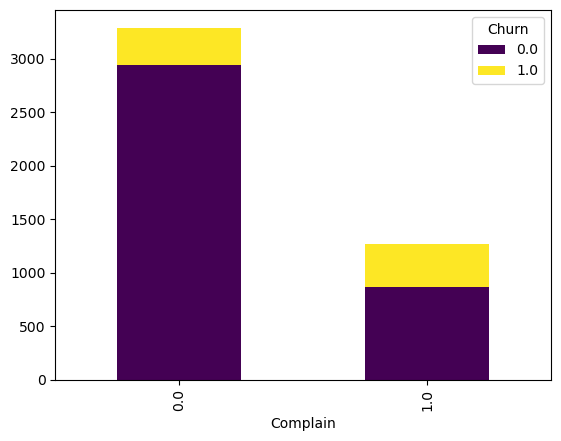

In [58]:
bivariate_visuals_cate(data, 'Complain', 'Churn')

#### Insights Complains with Churn
The data highlights a significant difference in churn based on complaints: 408 out of 1269 customers who have registered complaints churn, which is a much higher rate compared to those who have not complained (350 out of 3290). This suggests that addressing the issues leading to complaints more effectively could substantially reduce churn

#### Order Amount Hike From Last Year with Churn

Churn                        0.0  1.0
OrderAmountHikeFromlastYear          
11.0                         237   65
12.0                         472  118
13.0                         518  103
14.0                         517   93
15.0                         378   67
16.0                         232   49
17.0                         200   45
18.0                         223   43
19.0                         215   35
20.0                         177   25
21.0                         137   22
22.0                         116   31
23.0                          92   30
24.0                          48   22
25.0                          54   11
26.0                          25    2


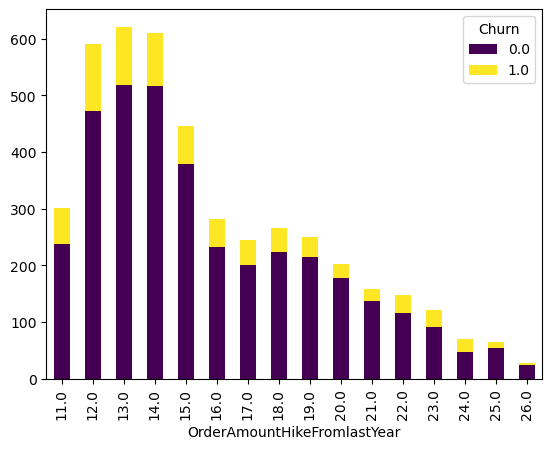

In [59]:
bivariate_visuals_cate(data, 'OrderAmountHikeFromlastYear', 'Churn')

#### Insights Order Amount Hike From Last Year with Churn
The data reveals a pattern where churn generally decreases as the percentage increase in order amount from the previous year rises. For instance, at a lower hike of 11%, the churn rate is relatively higher (65 out of 302), whereas at a 26% hike, the churn is significantly lower (2 out of 27). This suggests that customers who experience modest increases in order amounts are more likely to remain loyal, possibly viewing these increases as reasonable or reflective of added value.

#### Coupon Used with Churn

Churn          0.0    1.0
CouponUsed               
0.0          714.0  154.0
1.0         1432.0  306.0
2.0          887.0  181.0
3.0          227.0   46.0
4.0          135.0   24.0
5.0           78.0   17.0
6.0           66.0   13.0
7.0           49.0   14.0
8.0           30.0    8.0
9.0            7.0    1.0
10.0           8.0    3.0
11.0           8.0    1.0
12.0           7.0    1.0
13.0           7.0    NaN
14.0           5.0    NaN
16.0           1.0    1.0


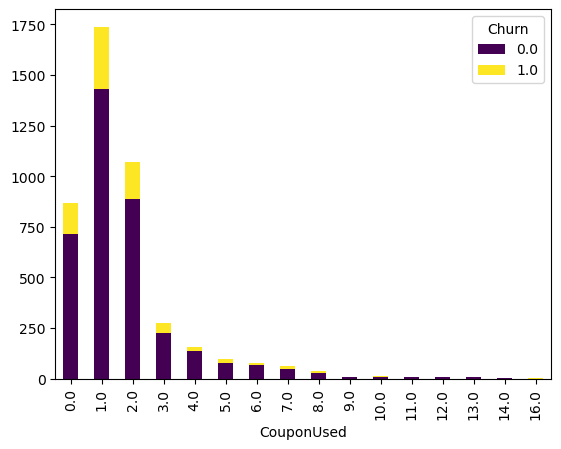

In [60]:
bivariate_visuals_cate(data, 'CouponUsed', 'Churn')

#### Insights Coupon Used with Churn

Trend where churn rates generally decrease as the number of coupons used increases. For customers using no coupons, the churn rate is higher (154 out of 868), whereas those using more coupons, such as 14 and above, show no churn at all. This pattern indicates that engaging customers with more coupon offers could significantly enhance retention

#### Orders Countwith Churn

Churn        0.0  1.0
OrderCount           
1.0         1182  260
2.0         1399  294
3.0          246   58
4.0          136   31
5.0          140   13
6.0          101   15
7.0          119   31
8.0          114   26
9.0           42    5
10.0          25    5
11.0          34    6
12.0          43    2
13.0          21    2
14.0          24    4
15.0          23    5
16.0          14    3


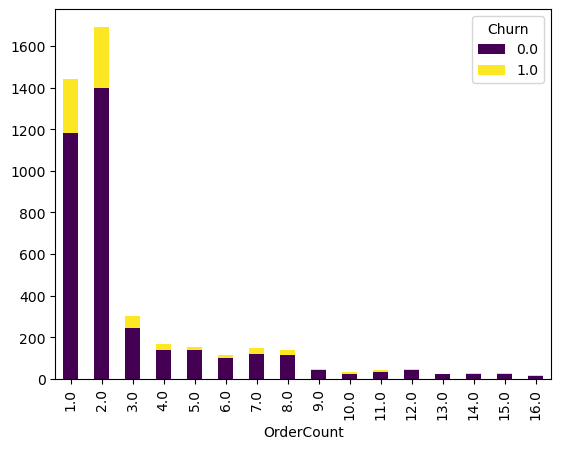

In [61]:
bivariate_visuals_cate(data, 'OrderCount', 'Churn')

#### Insights Orders Countwith Churn

Customers who place fewer orders (1 or 2 per month) have relatively higher churn rates (260 out of 1442 for 1 order, and 294 out of 1693 for 2 orders) compared to those who place more frequent orders. As the number of orders increases beyond 2, the churn rate generally decreases, indicating stronger loyalty among more active customers.

#### Day Since Last Order

Churn                0.0    1.0
DaySinceLastOrder              
0.0                279.0  139.0
1.0                356.0  148.0
2.0                560.0  104.0
3.0                631.0  109.0
4.0                313.0   49.0
5.0                169.0   21.0
6.0                 76.0   11.0
7.0                295.0   56.0
8.0                376.0   48.0
9.0                223.0   23.0
10.0               129.0    7.0
11.0                74.0    4.0
12.0                52.0    2.0
13.0                47.0    NaN
14.0                26.0    2.0
15.0                13.0    2.0
16.0                13.0    NaN
17.0                14.0    NaN
18.0                10.0    NaN
31.0                 1.0    NaN
46.0                 NaN    1.0


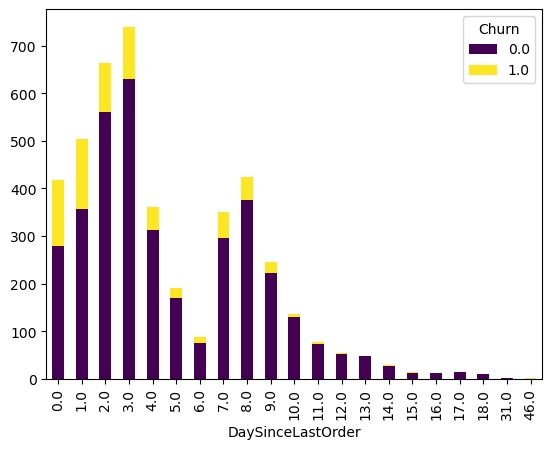

In [62]:
bivariate_visuals_cate(data, 'DaySinceLastOrder', 'Churn')

#### Insights Day Since Last Order With Churn

Churn rates are highest among customers with recent interactions (0 to 2 days since last order), suggesting potential dissatisfaction or unresolved issues shortly after their last transaction. The churn significantly decreases as the days since the last order increase, indicating that customers who do not engage for longer periods are more likely to stay, possibly due to resolved issues or satisfaction with their last interaction

#### Cash back Amount With Churn

             mean  median     max     min  count
Churn                                           
0.0    180.701535  166.05  324.99    0.00   3786
1.0    160.589788  149.62  323.59  110.09    754


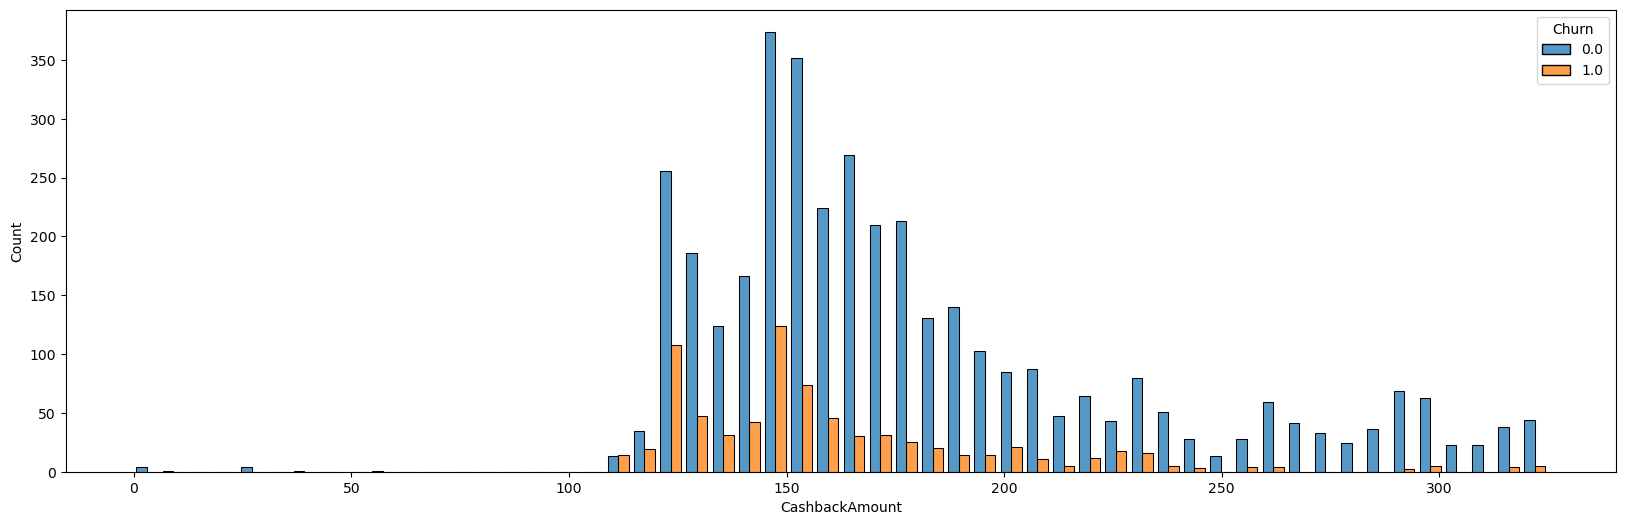

In [64]:
bivariate_visuals_numerical(data, 'CashbackAmount', 'Churn')

#### Insights Cash Back Amount With Churn
The data indicates that customers who do not churn receive a higher average and median cashback amount ($180.70 and $166.05, respectively) compared to those who churn ($160.59 and $149.62, respectively). This suggests that higher cashback amounts are associated with better customer retention. Enhancing cashback offers could potentially be a strategic approach to reducing churn, as it appears to positively influence customer loyalty and satisfaction.

#### Multivariate Analysis

1. Do customers with high SatisfactionScore and longer Tenure churn less? How does PreferredLoginDevice impact this relationship?
2. How do CityTier, PreferredPaymentMode, and OrderCount relate to churn behavior? Are customers in a specific tier more likely to churn?
3. Do higher cashback amounts or order amount hikes reduce churn, even for customers far from the warehouse?
4. Do customers who spend more time on the app but haven’t ordered recently show a higher likelihood of churn? How does coupon usage affect this?
5. Do customers who complain more and have a higher number of addresses churn faster, regardless of their tenure?

#### 1

In [67]:
data.pivot_table(index='PreferredLoginDevice', columns='Churn', 
                         values=['Tenure', 'SatisfactionScore'], aggfunc='mean')

SatisfactionScore               Tenure          
Churn                              0.0       1.0        0.0       1.0
PreferredLoginDevice                                                 
Computer                      2.909919  3.401606  11.230844  3.495868
Mobile Phone                  2.991407  3.325490  12.543842  5.296703
Phone                         3.123440  3.562500   8.754360  2.421320

Customers with higher Satisfaction Scores and longer Tenures tend to churn less. Combined "Mobile" users show the highest retention (mean tenure: 12.54 months, churn score: 3.33), while "Phone" users experience shorter tenures (8.75 months) and higher churn. Focusing on improving satisfaction and engagement for "Phone" users can significantly enhance retention.

#### 2

/var/folders/yx/plt06p490v30f5w_f7hdkdt00000gn/T/ipykernel_9092/4083734168.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='CityTier', y='OrderCount', hue='Churn', ci=None)


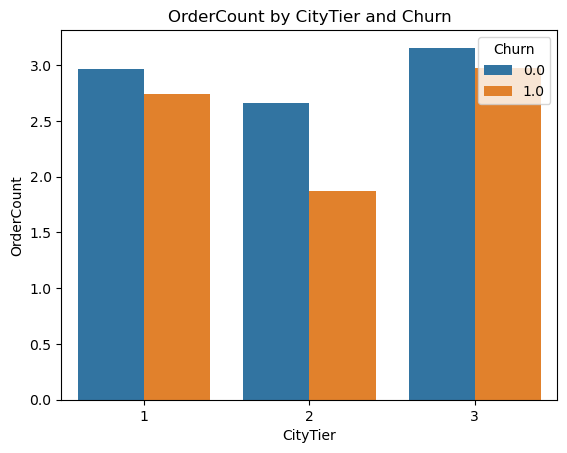

In [68]:
sns.barplot(data=data, x='CityTier', y='OrderCount', hue='Churn', ci=None)
plt.title('OrderCount by CityTier and Churn')
plt.show()

#### 3

In [69]:
data.groupby('Churn')[['WarehouseToHome', 'CashbackAmount', 
                                 'OrderAmountHikeFromlastYear']].mean()

,WarehouseToHome,CashbackAmount,OrderAmountHikeFromlastYear
Churn,,,
0.0,15.423419,180.701535,15.754188
1.0,17.106686,160.589788,15.708279


Cashback amounts correlate with lower churn, as non-churning customers receive an average cashback of 180.70 compared to 160.59 for churners. Interestingly, similar order amount hikes (15.75 vs. 15.71) show no significant impact on churn. However, customers farther from the warehouse exhibit higher churn (17.11 vs. 15.42), indicating that while cashback helps retention, it may not fully mitigate the dissatisfaction caused by longer delivery distances.

#### 4

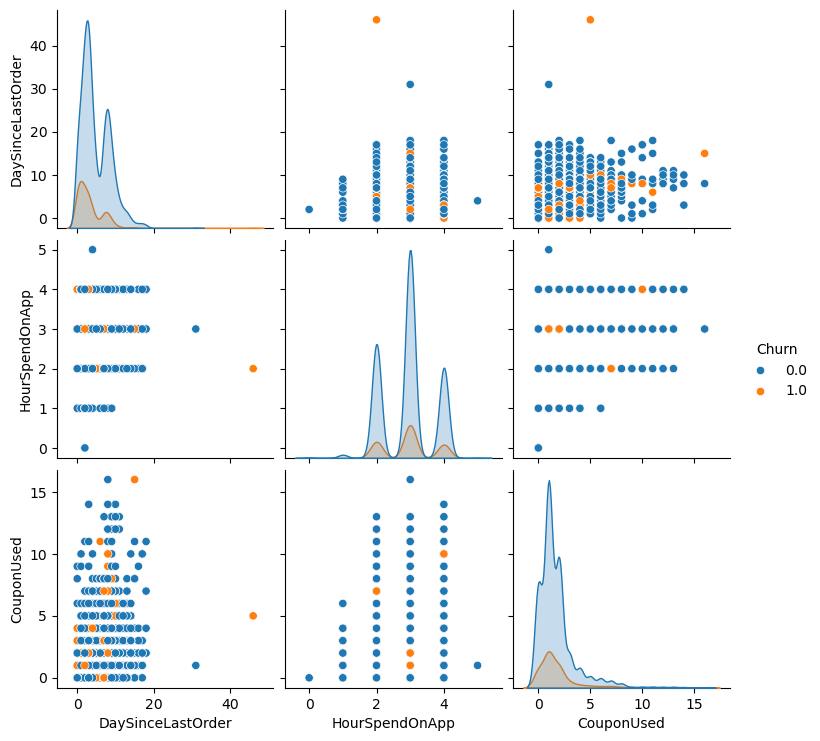

In [70]:
sns.pairplot(data, vars=['DaySinceLastOrder', 'HourSpendOnApp', 'CouponUsed'], hue='Churn')
plt.show()

#### 5

In [71]:
data.groupby('Churn')[['Complain', 'NumberOfAddress', 'Tenure']].mean()

,Complain,NumberOfAddress,Tenure
Churn,,,
0.0,0.226519,4.186788,11.471018
1.0,0.538259,4.595607,3.889045


Customers who complain more (average complaints: 0.54 for churners vs. 0.23 for non-churners) and have a slightly higher number of addresses (4.60 vs. 4.19) are more likely to churn. Additionally, churners have significantly shorter tenures (3.89 vs. 11.47 months), suggesting that complaints and address management issues accelerate churn, particularly for newer customers